# Demographics of Israel - Exploratory data analysis with Python & Wikipedia
## By Ori Rosenthal

In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from PIL import Image
from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
plt.style.use('fivethirtyeight')
%matplotlib inline

[Demographics of Israel From Wikipedia link](https://en.wikipedia.org/wiki/Demographics_of_Israel)

In [2]:
# Scrap all the tables data from Wikipedia article
df = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Israel")
print(f'Number of table:{len(df)}')

Number of table:23


In [3]:
# Inspect the tables that stored in df list
df[5]

,0,1,2
0,Group,Population,%
1,Jews,6554500,74.50%
2,Muslims,1561700,17.75%
3,Christians,171900,1.95%
4,Druze,141200,1.60%
5,Other/unknown,368600,4.19%


## Build clean Data Sets from some tables in *df* 
by removing characters from string, changing their data-types, set index,etc.. 

### The tables will be stored in 5 data-sets:
* Population and Religious (df_religious)
* Births, in absolute numbers, by mother's religion (df_births)
* Births and deaths (df_bd)
* Structure of the population (df_structure)
* Total fertility rate since 2000 (df_fertilty)


In [4]:
# Population and Religious (df_religious)
df_religious = pd.DataFrame(df[5].values[1:], columns=df[5].iloc[0])
df_religious.set_index('Group', inplace=True)
df_religious['Population'] = df_religious['Population'].astype(int)
df_religious['%'] = df_religious['%'].astype(str)
df_religious['%'] = df_religious['%'].str.replace("%","").astype('float')
df_religious[:-1].sort_values(by='Population', ascending=False)
df_religious.loc['Total',:] = df_religious.sum(axis=0).round()
del df_religious.columns.name
df_religious

,Population,%
Group,,
Jews,6554500.0,74.50
Muslims,1561700.0,17.75
Christians,171900.0,1.95
Druze,141200.0,1.60
Other/unknown,368600.0,4.19
Total,8797900.0,100.00


In [5]:
# Births, in absolute numbers, by mother's religion (df_births)
df_births = pd.DataFrame(df[9].values[1:], columns=df[9].iloc[0])
df_births[['Year','Jewish','Muslim','Christian','Druze','Others','Total']] = \
df_births[['Year','Jewish','Muslim','Christian','Druze','Others','Total']].apply(pd.to_numeric)
df_births['% Muslim'] = df_births['% Muslim'].astype(str)
df_births['% Muslim'] = df_births['% Muslim'].str.replace("%","").astype('float')
df_births['% Jewish'] = df_births['% Jewish'].astype(str)
df_births['% Jewish'] = df_births['% Jewish'].str.replace("%","").astype('float')
df_births['Year'] = pd.to_datetime(df_births['Year'],format='%Y')
df_births.set_index('Year', inplace=True)
df_births.index = df_births.index.year
del df_births.columns.name
df_births.head()

,Jewish,Muslim,Christian,Druze,Others,Total,% Jewish,% Muslim
Year,,,,,,,,
1996,83710,30802,2678,2682,1461,121333,69.0,25.4
2000,91936,35740,2789,2708,3217,136390,67.4,26.2
2005,100657,34217,2487,2533,4019,143913,69.9,23.8
2006,104513,34337,2500,2601,4219,148170,70.5,23.2
2007,107986,34572,2521,2510,4090,151679,71.2,22.8


In [6]:
# Births and deaths (df_bd)
df_bd = df[10].copy()
df_bd = pd.DataFrame(df[10].values[1:], columns=df[10].iloc[0])
for i in df_bd.columns:
    df_bd[i] = df_bd[i].str.replace(" ","").apply(pd.to_numeric) # replacing spaces and changing data type to numeric
df_bd['Year'] = pd.to_datetime(df_bd['Year'],format='%Y')
df_bd.set_index('Year', inplace=True)
df_bd.index = df_bd.index.year
del df_bd.columns.name
df_bd.rename(columns={'Population (x1000)':'Population'}, inplace=True)
df_bd['Population'] = df_bd['Population'] * 1000 
df_bd['TFR'] = df_bd['TFR'].ffill().bfill() # filling missing values forward and backward fill
df_bd.head()

,Population,Live births,Deaths,Natural increase,Crude birth rate,Crude death rate,Rate of natural increase,TFR
Year,,,,,,,,
1950,1370000,43431,8700,34731,34.1,6.8,27.3,4.03
1951,1578000,50542,9866,40676,34.3,6.7,27.6,4.03
1952,1630000,52556,11666,40890,32.8,7.3,25.5,4.03
1953,1669000,52552,10916,41636,31.9,6.6,25.3,4.03
1954,1718000,48951,11328,37623,28.9,6.7,22.2,4.03


In [7]:
# Structure of the population (01.07.2012)  (df_structure)
df_structure = df[11].copy()
df_structure = pd.DataFrame(df[11].values[1:], columns=df[11].iloc[0])
df_structure['Male'] = df_structure.Male.str.replace(" ","").apply(pd.to_numeric)
df_structure['Female'] = df_structure.Female.str.replace(" ","").apply(pd.to_numeric)
df_structure['Total'] = df_structure.Total.str.replace(" ","").apply(pd.to_numeric)
df_structure['%'] = (df_structure['%'].str.replace(" ","").apply(pd.to_numeric))/100
df_structure = df_structure.iloc[1:]
df_structure['Age Group'] = df_structure['Age Group'].astype('category')
df_structure.set_index('Age Group', inplace=True)
del df_structure.columns.name
df_structure.head()

,Male,Female,Total,%
Age Group,,,,
0-4,417479,397686,815165,10.30
5-9,377005,358520,735525,9.30
10-14,346662,329776,676438,8.55
15-19,314286,299211,613497,7.76
20-24,300332,289936,590268,7.46


In [8]:
# Total fertility rate since 2000 (df_fertilty)
df_fertility = df[14].copy()
df_fertility = pd.DataFrame(df[14].values[1:], columns=df[14].iloc[0])
df_fertility = df_fertility.apply(pd.to_numeric)
df_fertility.set_index('Year', inplace=True)
del df_fertility.columns.name
df_fertility.head()

,Jews,Muslims,Christians,Druze,Others,Total
Year,,,,,,
2000,2.66,4.74,2.55,3.07,NaN,2.95
2001,2.59,4.71,2.46,3.02,NaN,2.89
2002,2.64,4.58,2.29,2.77,NaN,2.89
2003,2.73,4.50,2.31,2.85,NaN,2.95
2004,2.71,4.36,2.13,2.66,1.47,2.90


### Using the *describe* function we can demonstreate some table statistics 

In [9]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset.
df_bd.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Population,69.0,4631855.0,2207732.0,1370000.0,2776000.0,4200000.0,6509000.0,8970000.0
Live births,69.0,105061.0,41091.0,43431.0,67148.0,98763.0,136636.0,184135.0
Deaths,69.0,27482.0,10958.0,8700.0,17463.0,27805.0,37688.0,44867.0
Natural increase,69.0,77580.0,30481.0,34731.0,50566.0,70993.0,99450.0,139684.0
Crude birth rate,69.0,24.0,3.0,21.0,21.0,23.0,26.0,34.0
Crude death rate,69.0,6.0,1.0,5.0,6.0,6.0,7.0,7.0
Rate of natural increase,69.0,18.0,3.0,15.0,16.0,17.0,20.0,28.0
TFR,69.0,3.0,0.0,3.0,3.0,3.0,4.0,4.0


### Transform Yearly Population data to yearly precent_change

In [10]:
print(df_bd.Population.tail())
pct = df_bd.Population.pct_change()*100
pct.tail()

Year
2014    8297000
2015    8463000
2016    8629000
2017    8798000
2018    8970000
Name: Population, dtype: int64


Year
2014    2.003934
2015    2.000723
2016    1.961479
2017    1.958512
2018    1.954990
Name: Population, dtype: float64

### and visualize the historical results for *pct*

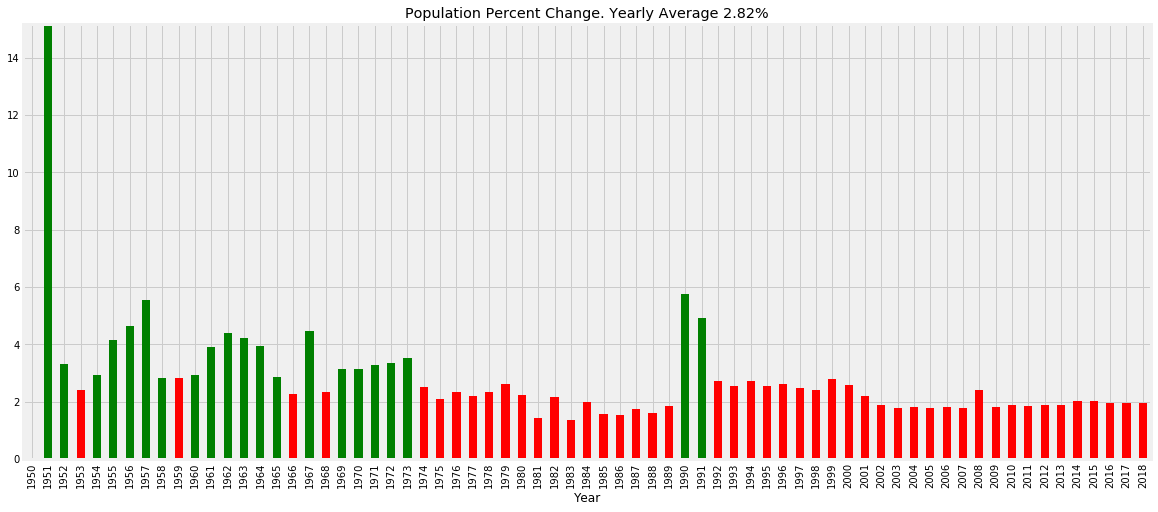

In [11]:
pct.plot(kind='bar',figsize=(18,8), title=f'Population Percent Change. Yearly Average {np.round(pct.mean(),2)}%',
 color=['g' if x > pct.mean() else 'r' for x in pct]);
# Green Bar = above percent change average, Red Bar = below percent change average 

###### As we can see, the years between 1948 (when Israel became independent) and 1951 witnessed the largest migration ever to reach the shores of modern Israel. Subsequent waves of immigration arrived in 1955-57, 1961-64, 1969-73, and 1990/1 (from the former Soviet Union)  

### Next, let's produce analysis of Israeli population by age & gender:

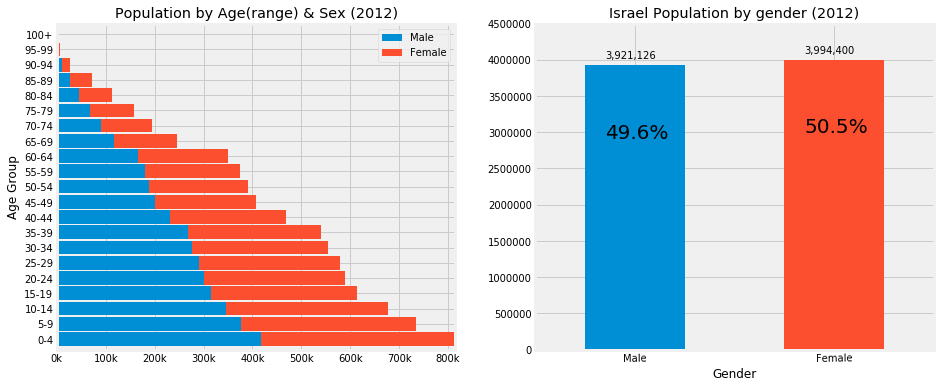

In [12]:
fig, ax = plt.subplots(1,2)
df_structure.iloc[:,:2].plot.barh(stacked=True, figsize=(14,6), width = 0.9,
title='Population by Age(range) & Sex (2012)', ax=ax[0]);
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(int(x)/1000)+'k'))                        
df_structure[['Male','Female']].sum().plot(kind='bar', ylim=(0,4500000), rot=True, figsize=(14,6), ax=ax[1]);
for i, v in enumerate(df_structure[['Male','Female']].sum()):
    plt.text(i-0.15,v+100000, '{:,}'.format(v));
    plt.text(i-0.15, v-1000000,str((v/df_structure[["Total"]].sum()[0]).round(3)*100)+"%", fontsize=20)
plt.title("Israel Population by gender (2012)")
plt.xlabel("Gender");

### and of course by religion:

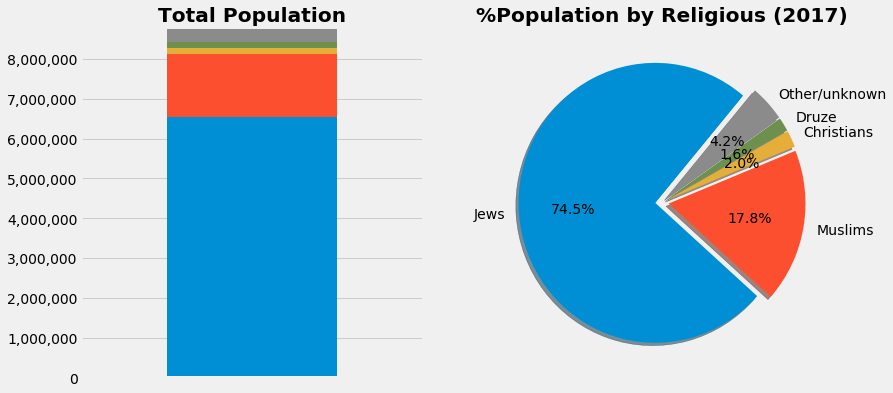

In [13]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,2)
df_religious.iloc[:-1,:-1].T.plot.bar(figsize=(12,6),stacked=True, ax=ax[0], legend=False);
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
ax[0].set_xticks([])
ax[0].set_title("Total Population",fontweight="bold");
plt.pie(df_religious['%'][:-1],labels=df_religious.index[:-1],autopct='%1.1f%%', shadow=True,
        explode = (0.05, 0.05, 0.05, 0.05,0.05), startangle=50);
plt.title("%Population by Religious (2017)",fontweight="bold");

## After we saw how Israel population distribute by age, gender and religion,<br> let's dive into the numbers and trends of Israel yearly growth rate.
### First visualize the absolute numbers of live births vs deaths for the overall population:

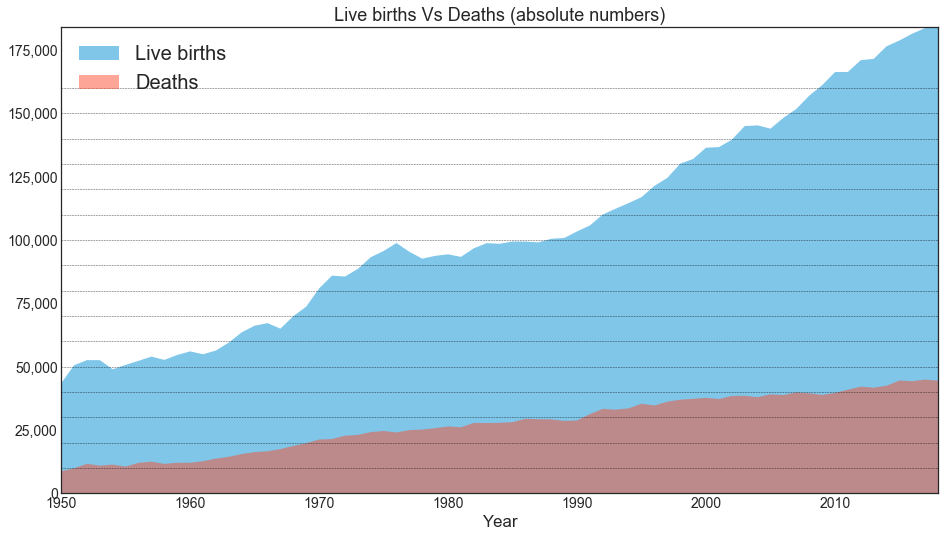

In [14]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.fill_between(df_bd.index, y1=df_bd['Live births'].values, y2=0, alpha=0.5, label=df_bd.columns[1], linewidth=2);
ax.fill_between(df_bd.index, y1=df_bd['Deaths'].values, y2=0, alpha=0.5,label = df_bd.columns[2], linewidth=2);
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.set_title('Live births Vs Deaths (absolute numbers)', fontsize=18)
ax.set_xlabel('Year')
ax.legend(loc=2, fontsize=20);
for y in range(0, 170000, 10000):    
    plt.hlines(y, xmin=df_bd.index.min(), xmax=df_bd.index.max(), colors='black', alpha=0.7, linestyles="--", lw=0.5)

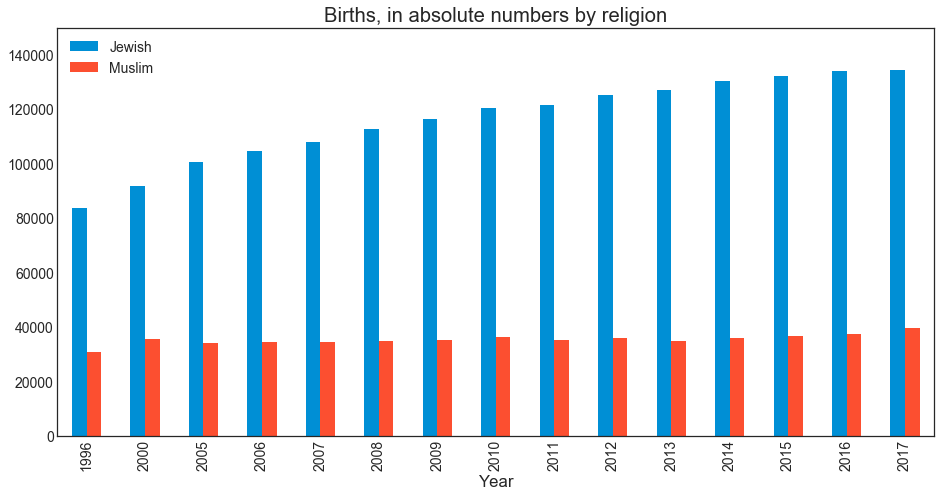

In [15]:
df_births[['Jewish','Muslim']].plot(kind='bar', figsize=(14,7), ylim=(0,150000),
                                    title="Births, in absolute numbers by religion");

<Figure size 432x288 with 0 Axes>

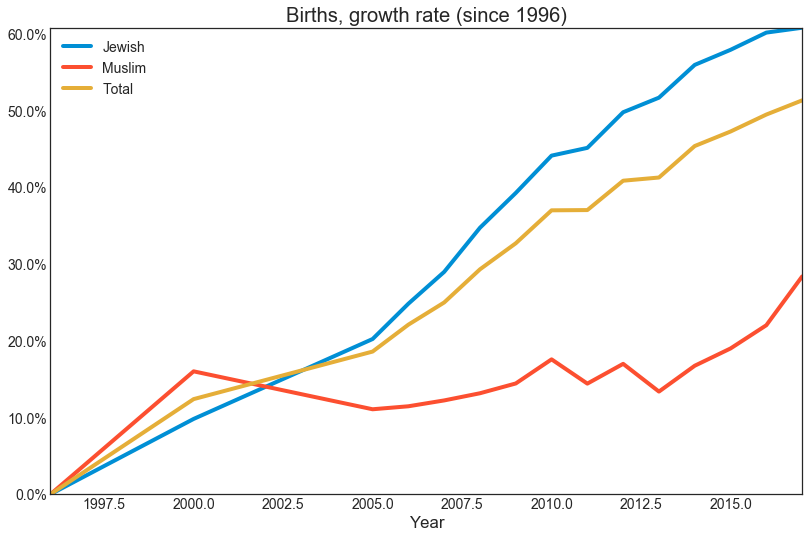

In [16]:
#  Normalized growth rate science 1996 (*not including Christian,Druze,Others as relatively insignificant)
ax = plt.figure()
ax = (df_births.iloc[:,[0,1,5]]/df_births.iloc[0,[0,1,5]]-1).plot(figsize=(12,8),title="Births, growth rate (since 1996)")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals]);

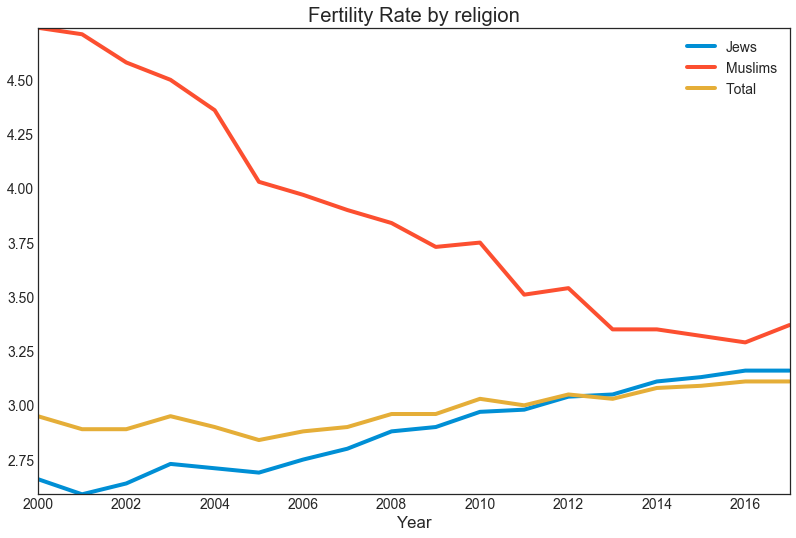

In [17]:
df_fertility[['Jews', 'Muslims', 'Total']].plot(figsize=(12,8), title=("Fertility Rate by religion"));

### As we can see from the charts above, after a downtrend in Muslims birthrate over the years,<br>The overall fertility rate is almost identical among Jewish and Arab-Muslims women. 

## Now, for the final chart, let's perform a simple population projection, by taking the last 10 years average growth rate of the overall population and compound it forward:

In [18]:
df_bdp = pd.DataFrame({'Population_est':range(70)}, index=(range(df_bd.index[-1],df_bd.index[-1]+70)))
df_bdp.loc[2018,'Population_est'] = df_bd.iloc[-1,0]
for i in range(1,len(df_bdp)):
    df_bdp.iloc[i,0] = (df_bdp.iloc[i-1,0] * (1+pct[-10:].mean()/100)).round(0)

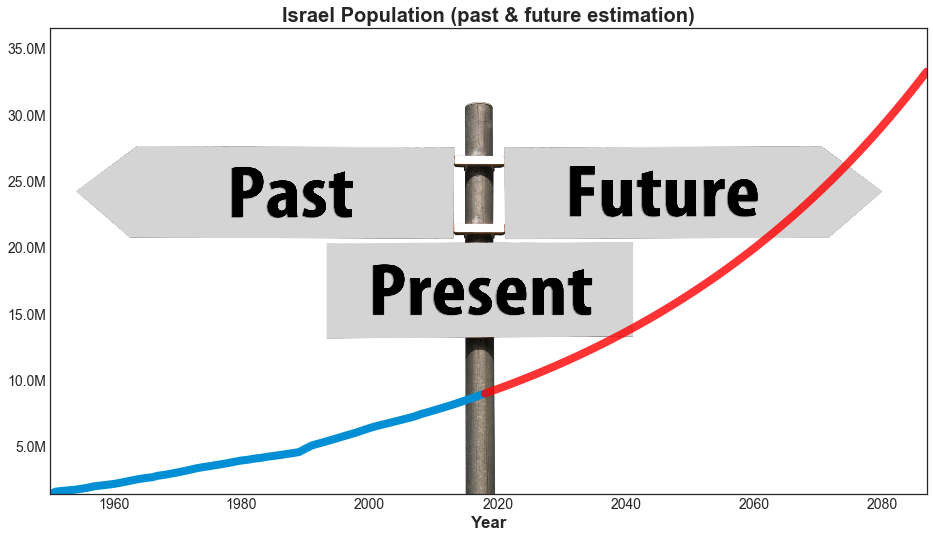

In [19]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,8))
im = np.array(Image.open(r'C:/Users/User/Desktop/pf3.jpg'))
x1, x2 = df_bd.index.min(), df_bdp.index.max()-3
y1, y2 = df_bd.Population.min(), df_bdp.Population_est.max() *1.1
ax.imshow(im, extent=[x1, x2, y1, y2], aspect='auto')
ax.plot(df_bd.index, df_bd.Population, lw=8)
ax.plot(df_bdp.index,df_bdp.Population_est,lw=8, color='r',alpha=0.8)
y_formatter = ticker.FuncFormatter(lambda x, loc: "{:,.1f}M".format(x*1e-6))
ax.yaxis.set_major_formatter(y_formatter);
ax.set_title("Israel Population (past & future estimation)",fontweight="bold");
ax.set_xlabel("Year",fontweight="bold",);